<a href="https://colab.research.google.com/github/subshr4/subshr4/blob/main/Exam_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exam 3

Subani Shrestha

CPSMA 4313 

(a) (10 points) Store the data as a pandas dataframe. Find your favorite ‘club’ or ‘nationality’ (that is present in the data!), include a picture that represents them and include it in your notebook. (If no favorite, just pick one!)


Firstly, I imported all the required libraries, then also stored the data as
pandas dataframe. Here I have also included the picture of my favourite club by importing image from IPython.display.

In [ ]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/worldCupPlayer.csv')
df

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
0,0,1,Hakim Ziyech,Ajax,25,34,3043,9,15,4,0,4.9,75.4,0.2,9,8.21,Morocco
1,2,2,Alireza Jahanbakhsh,AZ Alkmaar,24,33,2840,21,12,3,0,4.3,73.4,0.7,14,8.20,Iran
2,4,3,Hirving Lozano,PSV Eindhoven,22,29,2350,17,8,4,2,3.4,75.3,0.6,8,7.90,Mexico
3,6,11,Lasse Schone,Ajax,32,27(3),2350,10,3,6,0,1.9,87.0,1.9,2,7.45,Denmark
4,10,25,Santiago Arias,PSV Eindhoven,26,30,2664,3,6,5,0,1.5,82.3,1,2,7.25,Colombia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1150,200,Giancarlo Gonzalez,Bologna,30,22,1858,0,0,4,2,-,80.6,2.4,0,6.63,Costa Rica
599,1152,217,Stephan Lichtsteiner,Juventus,34,21(6),1715,0,2,6,0,0.1,82.2,0.9,0,6.59,Switzerland
600,1154,235,Dawid Kownacki,Sampdoria,21,6(16),811,5,1,0,0,1,75.4,1.4,0,6.51,Poland
601,1156,265,Emil Hallfredsson,Udinese,33,8(11),761,0,0,5,0,0.1,88.5,0.6,0,6.39,Iceland


b) Show a table with all the data about your favorite club or nationality. Include some description about an interesting fact in the data

Here I  selected Crotone as my favourite club, and showed it in table. 

In [ ]:
df_table = df[df['club'].str.contains('Crotone')]
df_table

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS,AerialsWon,MotM,Rating,nationality
602,1158,269,Marcus Rohden,Crotone,27,20(6),1637,2,0,2,0,0.8,67.6,0.8,0,6.35,Sweden



(c) (10 points) Create a histogram of the ‘Goals’.

Here. I created histogram of goals by using plot.hist,  20 bins, and red color.

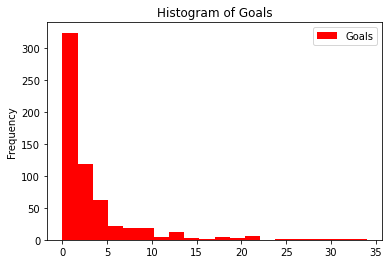

In [ ]:
df.Goals.plot.hist(bins = 20, legend = True, title = "Histogram of Goals", color = "red" )
plt.show()

(d) (10 points) Create a histogram of the ‘Goals’ and ‘Assists’ on the same axis.

Here I used sns.distplot to get the histogram of both Goals and Assists where the blue bar represents Goals, and the yellow bar represents assist.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

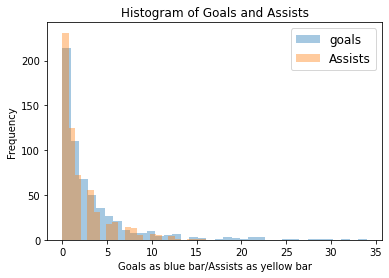

In [ ]:
sns.distplot(df['Goals'],  kde=False, label='goals')

sns.distplot(df['Assists'],  kde=False,label='Assists')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Histogram of Goals and Assists')
plt.xlabel('Goals as blue bar/Assists as yellow bar')
plt.ylabel('Frequency')

(e) (10 points) Create a barchart for most goals scored by nationality.

Here I used max to get the most goals and grouped it by nationality.

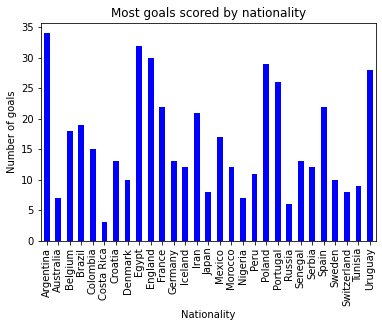

In [ ]:
ax = df.groupby('nationality').Goals.agg('max').plot.bar(color = "blue")
ax.set(title = "Most goals scored by nationality")
ax.set(xlabel = 'Nationality')
ax.set(ylabel = 'Number of goals')
plt.show()



(f) (10 points) Create a boxplot of ‘Yel’ (yellow cards) by nationality.

Here the boxplot is grouped by nationality and Yel.plot.box has been used to create the  boxplot of yellow card.

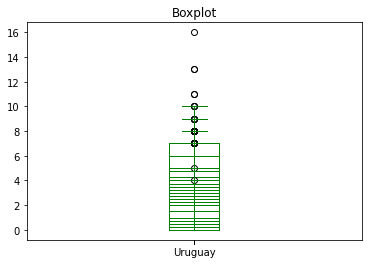

In [ ]:
df.groupby('nationality').Yel.plot.box(color = "green", title = "Boxplot")
plt.show()

(g) (10 points) Create ‘Goals’ and ‘Assists’ as scatter. Signify your favorite club or nationality in some way on the scatterplot. You may need to add a new column to the dataset to do so.

I used sns.scatterplot to create Goals and Assists scatter. I couldn't find the right way to signify my favourite club or nationality so I just mentioned all the nationality provided in the dataset.

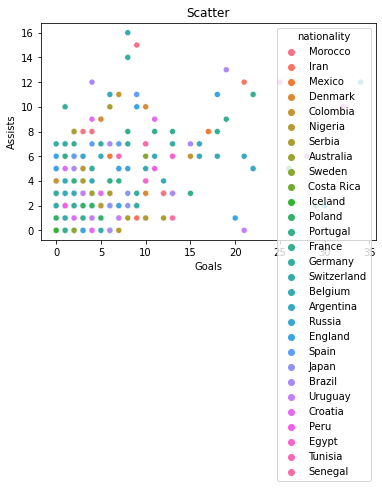

In [ ]:
ax = sns.scatterplot(data = df, x = 'Goals', y = 'Assists', hue = 'nationality')
ax.set(title = "Scatter")

plt.show()





Now, I added new column that contains both gials and assist. 

In [ ]:
def CrotoneGoals(row):
  return row.Goals

def CrotoneAssists(row):
  return row.Assists

In [ ]:
df2 = df[df['club'].str.contains('Crotone')]

df['C_goals'] = df2.apply(lambda row: CrotoneGoals(row), axis=1)

df['C_assists'] = df2.apply(lambda row: CrotoneAssists(row), axis=1)

In [ ]:
df['C_goals'] = df['C_goals'].fillna(0).astype(int)
df['C_goals'] = df['C_goals'].astype('int')
df['C_assists'] = df['C_assists'].fillna(0).astype(int)
df['C_assists'] = df['C_assists'].astype('int')

In [ ]:
df[df['club'].str.contains('Crotone')]

,Unnamed: 0,Rank,player,club,age,Apps,Mins,Goals,Assists,Yel,...,SpG,PS,AerialsWon,MotM,Rating,nationality,MUFC_goals,MUFC_assists,C_goals,C_assists
602,1158,269,Marcus Rohden,Crotone,27,20(6),1637,2,0,2,...,0.8,67.6,0.8,0,6.35,Sweden,2.0,0.0,2,0


Text(0.5, 1.0, 'A scatterplot of goals vs assist')

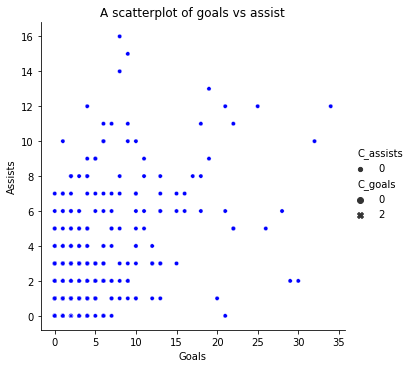

In [ ]:
sns.relplot(data = df, x = 'Goals', y = 'Assists', color = 'blue', style = 'C_goals', size = 'C_assists')

plt.title('A scatterplot of goals vs assist')

(h) (10 points) Create stacked barplot of goals and assists of French National Team. (they won this tourney!) Be sure to comment on why it is appropriate to stack goals and assists.

Here, I used stack=true to show the stack bar. 

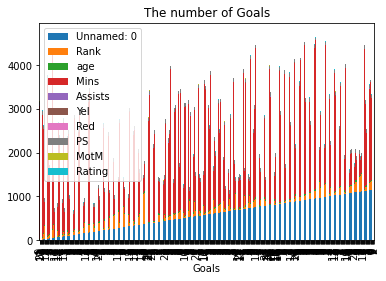

In [ ]:
df.plot.bar(x='Goals', stacked=True, title='The number of Goals')


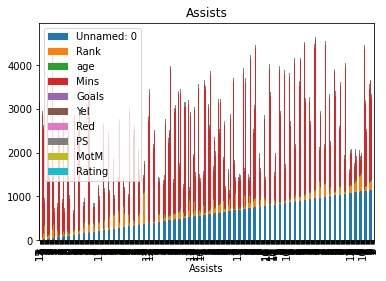

In [ ]:
df.plot.bar(x='Assists', stacked=True, title='Assists')

(i) (10 points) Create a correlation heatmap of the entire dataset

To create a correlation heatmap firstly, I entered dataframe correlation then used sns.heatmap to get heatmap of the entire dataset.

In [ ]:
df.corr()

,Unnamed: 0,Rank,age,Mins,Goals,Assists,Yel,Red,PS,MotM,Rating
Unnamed: 0,1.000000,-0.035885,-0.029711,0.089415,-0.014413,-0.014623,0.002472,0.055852,0.017547,-0.050380,-0.113085
Rank,-0.035885,1.000000,-0.009795,-0.448996,-0.368658,-0.415454,-0.305560,-0.060812,-0.184426,-0.402011,-0.742297
age,-0.029711,-0.009795,1.000000,0.032110,-0.048792,-0.107610,0.034491,0.021850,-0.074136,-0.028829,-0.004873
Mins,0.089415,-0.448996,0.032110,1.000000,0.324553,0.392787,0.566826,0.162371,-0.147275,0.379439,0.157395
Goals,-0.014413,-0.368658,-0.048792,0.324553,1.000000,0.558772,0.192640,0.033495,-0.061200,0.719848,0.502048
Assists,-0.014623,-0.415454,-0.107610,0.392787,0.558772,1.000000,0.239014,0.077767,0.067516,0.585102,0.490883
Yel,0.002472,-0.305560,0.034491,0.566826,0.192640,0.239014,1.000000,0.158042,0.078872,0.228264,0.102395
Red,0.055852,-0.060812,0.021850,0.162371,0.033495,0.077767,0.158042,1.000000,0.034873,0.065881,0.009251
PS,0.017547,-0.184426,-0.074136,-0.147275,-0.061200,0.067516,0.078872,0.034873,1.000000,-0.045479,0.164801
MotM,-0.050380,-0.402011,-0.028829,0.379439,0.719848,0.585102,0.228264,0.065881,-0.045479,1.000000,0.603158


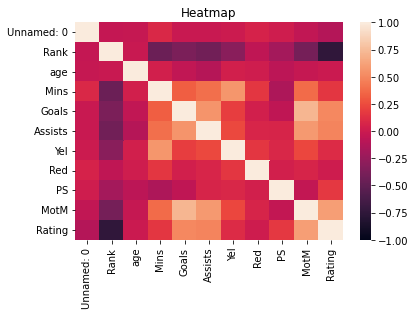

In [ ]:
ax = sns.heatmap(df.corr(),vmin = -1)
ax.set(title = 'Heatmap')

plt.show()



2. (10 points) Questions about the exam

(a) Approximately how long did you work on this exam?

-> It took me around 4 hours to complete this exam.



(b) Which was the hardest and easiest topic from this section?

-> The hardest topic here was to create the scatterplot with favourite club or nationality. The easiest topic was creating the histogram.




(c) Which method of visualization are you still unclear what it might show?

-> I am still unclear about the scatterplot question where I need to add favourite club or nationality as well. 

Reference:

https://github.com/nurfnick/Data_Viz/

https://github.com/subshr4

https://github.com/nurfnick/Data_Viz/blob/main/30_Visualize_Conclusion.ipynb